In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [2]:
csvpath = "life_expectancy.csv"
life_expectancy_df = pd.read_csv(csvpath)
life_expectancy_df.head()

,State,County,Census Tract Number,Life Expectancy,Life Expectancy Range,Life Expectancy Standard Error
0,Alabama,(blank),NaN,75.5,75.2-77.5,0.0328
1,Alabama,"Autauga County, AL",201.0,73.1,56.9-75.1,2.2348
2,Alabama,"Autauga County, AL",202.0,76.9,75.2-77.5,3.3453
3,Alabama,"Autauga County, AL",203.0,NaN,NaN,NaN
4,Alabama,"Autauga County, AL",204.0,75.4,75.2-77.5,1.0216


In [3]:
life_expectancy_df = life_expectancy_df.loc[life_expectancy_df['State'] == 'Minnesota']
array = ['Anoka County, MN', 'Carver County, MN', 'Hennepin County, MN', 'Dakota County, MN', 'Ramsey County, MN',
        'Scott County, MN', 'Washington County, MN']
life_df = life_expectancy_df.loc[life_expectancy_df['County'].isin(array)]
life_df

,State,County,Census Tract Number,Life Expectancy,Life Expectancy Range,Life Expectancy Standard Error
35539,Minnesota,"Anoka County, MN",501.07,80.2,79.6-81.6,2.8459
35540,Minnesota,"Anoka County, MN",501.08,81.9,81.7-97.5,3.6909
35541,Minnesota,"Anoka County, MN",501.09,79.6,79.6-81.6,1.5213
35542,Minnesota,"Anoka County, MN",501.10,79.6,79.6-81.6,1.9407
35543,Minnesota,"Anoka County, MN",501.11,79.7,79.6-81.6,1.4118
...,...,...,...,...,...,...
36830,Minnesota,"Washington County, MN",712.07,80.1,79.6-81.6,1.4875
36831,Minnesota,"Washington County, MN",712.08,81.6,79.6-81.6,2.7008
36832,Minnesota,"Washington County, MN",712.09,79.7,79.6-81.6,1.9616
36833,Minnesota,"Washington County, MN",713.00,79.4,77.6-79.5,1.7947


In [4]:
life_df = life_df.drop(['State', 'Census Tract Number', 'Life Expectancy Range', 'Life Expectancy Standard Error'], axis=1)
life_df

,County,Life Expectancy
35539,"Anoka County, MN",80.2
35540,"Anoka County, MN",81.9
35541,"Anoka County, MN",79.6
35542,"Anoka County, MN",79.6
35543,"Anoka County, MN",79.7
...,...,...
36830,"Washington County, MN",80.1
36831,"Washington County, MN",81.6
36832,"Washington County, MN",79.7
36833,"Washington County, MN",79.4


In [5]:
life_df = life_df.groupby('County').mean()
life_df = life_df.reset_index()
life_df

,County,Life Expectancy
0,"Anoka County, MN",80.140260
1,"Carver County, MN",82.370588
2,"Dakota County, MN",80.683333
3,"Hennepin County, MN",80.320438
4,"Ramsey County, MN",79.533846
5,"Scott County, MN",80.809524
6,"Washington County, MN",81.847917


In [6]:
life_df.to_csv('life.csv')

In [7]:
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False)
life_df

,County,Life Expectancy
0,Anoka,80.140260
1,Carver,82.370588
2,Dakota,80.683333
3,Hennepin,80.320438
4,Ramsey,79.533846
5,Scott,80.809524
6,Washington,81.847917


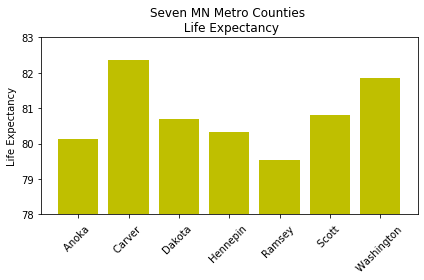

<Figure size 432x288 with 0 Axes>

In [8]:
x_axis = np.arange(len(life_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, life_df['Life Expectancy'], color ='y', align="center")
plt.xticks(tick_locations, life_df['County'],rotation ='45')
plt.ylabel('Life Expectancy')
plt.title('Seven MN Metro Counties \n Life Expectancy')

fig1 = plt.gcf()
plt.ylim(78,83)
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('life.png',dpi = 300)